In [1323]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1324]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1325]:
data = pd.read_csv('/content/drive/My Drive/Data for Models/googleplaystore.csv')

In [1326]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1327]:
#hot = [i for i in data['App'].value_counts().head().index]
#hot

In [1328]:
#for i in hot:
#  data[i] = np.where(data['App'] == i,1,0)


In [1329]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1330]:
def hot(df,col):
  x = [i for i in df[col].value_counts().head(10).index]
  for i in x:
    df[i] = np.where(df[col] == i,1,0)

In [1331]:
data.drop(columns=['Last Updated','Current Ver','Android Ver'],inplace=True)

In [1332]:
#for i in ['App','Category','Content Rating','Genres']:
#  hot(data,col=i)
map_App = data['App'].value_counts().to_dict()
map_Category = data['Category'].value_counts().to_dict()
map_Content_Rating = data['Content Rating'].value_counts().to_dict()
map_Genres = data['Genres'].value_counts().to_dict()

In [1333]:
data['App'] = data['App'].map(map_App)
data['Category'] = data['Category'].map(map_Category)
data['Content Rating'] = data['Content Rating'].map(map_Content_Rating)
data['Genres'] = data['Genres'].map(map_Genres)

In [1334]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,1,65,4.1,159,19M,"10,000+",Free,0,8714.0,58
1,2,65,3.9,967,14M,"500,000+",Free,0,8714.0,2
2,1,65,4.7,87510,8.7M,"5,000,000+",Free,0,8714.0,58
3,1,65,4.5,215644,25M,"50,000,000+",Free,0,1208.0,58
4,1,65,4.3,967,2.8M,"100,000+",Free,0,8714.0,7


In [1335]:
data.drop(columns=['App','Category','Content Rating','Genres'],inplace=True)

In [1336]:
data.dtypes

Rating      float64
Reviews      object
Size         object
Installs     object
Type         object
Price        object
dtype: object

In [1337]:
data['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [1338]:
data['Type'] = data['Type'].replace(0,np.NaN)
#data = pd.get_dummies(data,columns=['Type'])

In [1339]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price
0,4.1,159,19M,"10,000+",Free,0
1,3.9,967,14M,"500,000+",Free,0
2,4.7,87510,8.7M,"5,000,000+",Free,0
3,4.5,215644,25M,"50,000,000+",Free,0
4,4.3,967,2.8M,"100,000+",Free,0


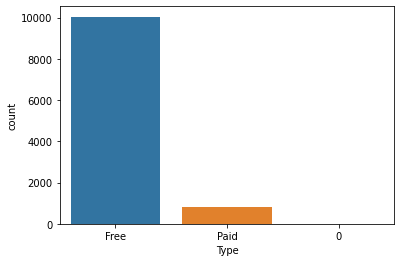

In [1340]:
sns.countplot(data['Type'])

In [1341]:
data['Installs'] = data['Installs'].str[0:-1]
data['Size'] = data['Size'].str[0:-1]
data['Reviews'] = data['Reviews'].str[0:-1]

In [1342]:
data['Size'] = data['Size'].replace('Varies with devic',np.NaN)
data['Installs'] = data['Installs'].replace('Fr',np.NaN)
data['Installs'] = data['Installs'].replace('',np.NaN)

In [1343]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price
0,4.1,15,19,"10,000",Free,0
1,3.9,96,14,"500,000",Free,0
2,4.7,8751,8.7,"5,000,000",Free,0
3,4.5,21564,25,"50,000,000",Free,0
4,4.3,96,2.8,"100,000",Free,0


In [1344]:
data['Price'] = data['Price'].replace('0','.0')
data['Price'] = data['Price'].str[1:]

In [1345]:
data['Price'] = data['Price'].replace('veryone',np.NaN)
#data['Price'] = data['Price'].replace('0',np.NaN)
data = data.drop(columns='Price')

In [1346]:
for i in ['Installs','Size','Reviews','Rating']:
  data[i] = pd.to_numeric(data[i],errors='coerce')

In [1347]:
data = data.dropna(how='any')

In [1348]:
data['Type'] = data['Type'].replace(['Free','Paid'],[0,1])

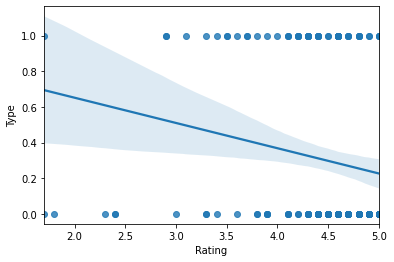

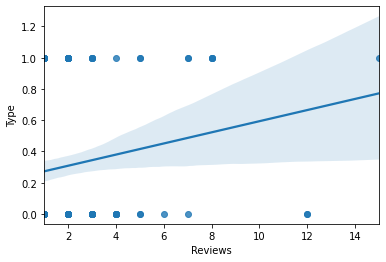

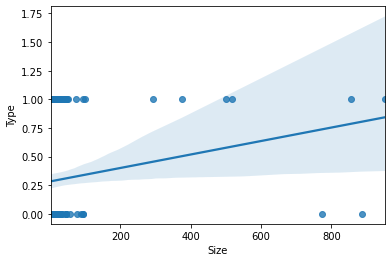

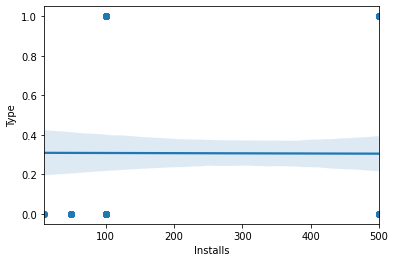

In [1349]:
for i in data.columns:
  if i != 'Type':
    sns.regplot(data[i],data['Type'],data)
    plt.show()

In [1350]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
model = KNeighborsClassifier()

In [1351]:
y = data.pop('Type')
x = data

In [1352]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [1353]:
scalar.fit_transform(x)

array([[8.18181818e-01, 7.14285714e-02, 2.51836306e-03, 1.00000000e+00],
       [9.39393939e-01, 7.14285714e-02, 4.09233998e-03, 1.00000000e+00],
       [9.09090909e-01, 0.00000000e+00, 4.19727177e-03, 1.00000000e+00],
       [8.48484848e-01, 7.85714286e-01, 9.44386149e-03, 1.00000000e+00],
       [8.18181818e-01, 7.14285714e-02, 2.51836306e-03, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.36411333e-03, 1.83673469e-01],
       [8.18181818e-01, 1.42857143e-01, 1.57397692e-02, 1.83673469e-01],
       [8.78787879e-01, 1.00000000e+00, 2.20356768e-02, 1.00000000e+00],
       [9.09090909e-01, 0.00000000e+00, 1.03882476e-01, 1.00000000e+00],
       [7.87878788e-01, 0.00000000e+00, 4.72193075e-02, 1.83673469e-01],
       [9.69696970e-01, 0.00000000e+00, 6.29590766e-03, 1.83673469e-01],
       [7.87878788e-01, 0.00000000e+00, 2.93809024e-02, 1.83673469e-01],
       [7.27272727e-01, 2.14285714e-01, 1.04931794e-02, 1.00000000e+00],
       [8.78787879e-01, 0.00000000e+00, 5.35152151e

In [1354]:
scalar.fit_transform(np.array(y).reshape(-1,1))

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],

In [1355]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=25)

In [1356]:
model.fit(x_train,y_train)
pred_y = model.predict(x_test)

In [1357]:
from sklearn.metrics import r2_score, accuracy_score

In [1358]:
#score = r2_score(y_test,y_pred=pred_y)
score = accuracy_score(y_test,y_pred=pred_y)

In [1359]:
f'your score is {score*100}'

'your score is 66.66666666666666'

In [1360]:
from sklearn.model_selection import GridSearchCV

In [1361]:
gcv = GridSearchCV

In [1362]:
parameters = {'n_neighbors':range(1,100,5),'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':range(10,100,10)}

In [1363]:
x = gcv(model,parameters,n_jobs=-1,cv=10).fit(x_train,y_train)

In [1364]:
x.best_score_

0.7642857142857143

In [1365]:
x.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 26,
 'weights': 'distance'}